## <center> SPACESHIP TITANIC

Spaceship Titanic is a Kaggle machine learning competition.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

### <center> 1. Library and Data

1.1. Import some core packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 15
%matplotlib inline

1.2. Loading data

In [ ]:
## I use Google Colab Jupiter Notebook, these lines are necessary to import file.
## If you use local Jupier Notebook, please skip this step

from google.colab import files
upload = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train data has {} rows and {} columns\n'.format(train.shape[1], train.shape[0]))
print('Test data has {} rows and {} columns\n'.format(test.shape[1], test.shape[0]))
print('Train sample')
train.head()

Train data has 14 rows and 8693 columns

Test data has 13 rows and 4277 columns

Train sample


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


1.3. Feature Description

  - **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  - **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
  - **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  - **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  - **Destination** - The planet the passenger will be debarking to.
  - **Age** - The age of the passenger.
  - **VIP** - Whether the passenger has paid for special VIP service during the voyage.
  - **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  - **Name** - The first and last names of the passenger.
  - **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<br>

  **Test data does not have Transported variable which we have to predict.**

<br>
<br>

### <center> 2. Data Structure

In this section, we will try to figure out: 
  - Data types. 
  - Missing values
  - Duplicates
  - Cardinality of features

2.1. Data types

In [ ]:
## Data type
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

2.2. Missing values

In [ ]:
## Missing values per variable
train_missing = train.isna().sum()
train_percent_missing = round(train_missing/train.shape[0]*100, 2)

test_missing = test.isna().sum()
test_percent_missing = round(test_missing/test.shape[0]*100, 2)

missing_table = pd.DataFrame(
    {'N/A in train set' : train_missing, '% N/A in train set':train_percent_missing,
     'N/A in test set' : test_missing, '% N/A in test set' : test_percent_missing}
     )

missing_table

,N/A in train set,% N/A in train set,N/A in test set,% N/A in test set
Age,179,2.06,91.0,2.13
Cabin,199,2.29,100.0,2.34
CryoSleep,217,2.50,93.0,2.17
Destination,182,2.09,92.0,2.15
FoodCourt,183,2.11,106.0,2.48
HomePlanet,201,2.31,87.0,2.03
Name,200,2.30,94.0,2.20
PassengerId,0,0.00,0.0,0.00
RoomService,181,2.08,82.0,1.92
ShoppingMall,208,2.39,98.0,2.29


In [ ]:
### Missing values for each passenger
missing_passenger = train.isna().sum(axis = 1).value_counts()

print('N/A per passenger:\n{}'.format(missing_passenger))
print('\n% passengers have at leats 1 missing values: {}'.format((len(train) - missing_passenger[0])/len(train) * 100))

N/A per passenger:
0    6606
1    1867
2     203
3      17
dtype: int64

% passengers have at leats 1 missing values: 24.007822385827676


Except PassengerId and Transported, all features have missing values from 2% to 2.5% in train set and from 1.8-2.5% in test set. These numbers are quite small but almost 25% of passengers have at least a missing value. Thus we should try to fill in them rather than drop them.
<br>
<br>

2.3. Duplicates

In [ ]:
print('Duplicates in dataset: {} ({}%)'.format(train.duplicated().sum(), train.duplicated().sum()/len(train)*100) )

Duplicates in dataset: 0 (0.0%)


2.4. Cardinality of features

In [ ]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

<br>
<br>

### <center> 3. Exploratory Data Analysis

We will plot the distributions of
  - Target - Transported
  - Continuous features - Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
  - Categorical features - HomePlanet, CryoSleep, VIP, Destination
  - Qualitative features - PassengerId, Cabin, Name

> #### 3.1. Target distribution (Transported variable)

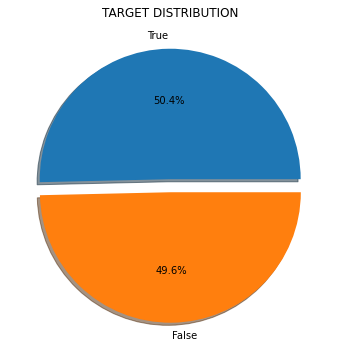

In [ ]:
targets = train['Transported'].value_counts()

# Pie plot
fig, ax = plt.subplots(figsize = (6,6))
ax.pie(targets, labels = targets.index, explode = [0.05, 0.05], autopct='%1.1f%%', shadow = True)
plt.title('TARGET DISTRIBUTION')
plt.show()

Basically, the possibility of getting transported and no transported to other dimensions is approximately 50-50%

> #### 3.2. Continuous Features
Continuous features include 
  - 3.2.1. Age 
  - 3.2.2. Extra services - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

> We will plot histograms for these feature to evaluate the connection of these variable and the frequency of transported targets.

<br>

> > 3.2.1. AGE

First of all, we plot the histogram of passengers' ages to estimate the likelihood of the transported possibilities and divide the data into groups

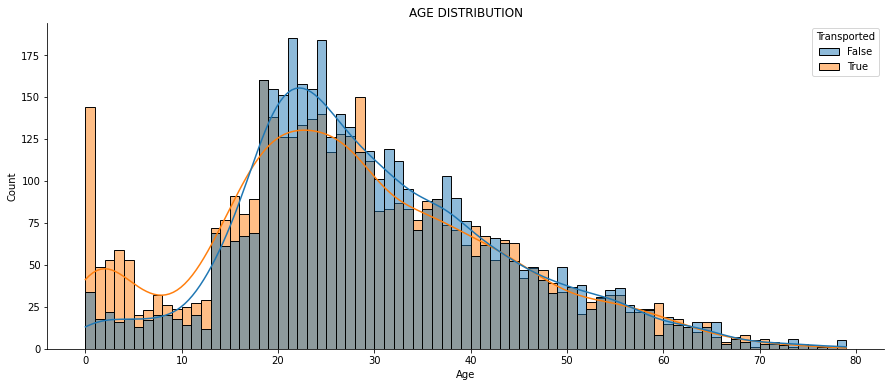

In [ ]:
plt.figure(figsize = (15, 6))
sns.histplot(data = train, x = 'Age', hue = 'Transported', kde = True, binwidth = 1)
sns.despine(bottom = False, left = False)
plt.xlabel('Age')
plt.title('AGE DISTRIBUTION')
plt.show()

From the age histogram, we can see that:
  - From 0-18 years-old, passergers are more likely to be trasported to other dimnesions.
  - From 18-40 years-old, passergers are less likely to be transported successfully.
  - Over 40 years-old, the possibilities of success and non-success seem equal.

Therefore, we can divide Age into 3 groups: young, middle, old

> > 3.2.2. EXTRA SERVICES

<function matplotlib.pyplot.show>

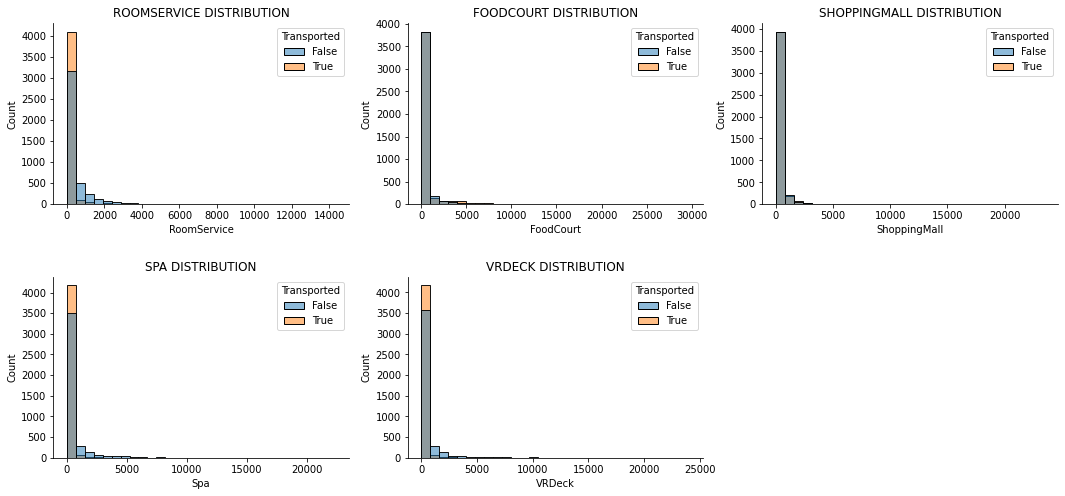

In [ ]:
extra_services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plots
fig = plt.figure(figsize = (18, 8))
nrows = 2
ncols = 3

for i, service in enumerate(extra_services):

  fig.add_subplot(nrows, ncols, i+1)
  ax = sns.histplot(data = train, x = service, hue = 'Transported', kde=False, bins = 30)
  sns.despine(bottom = False, right = 'False')
  ax.set(xlabel = service, title = service.upper() + ' DISTRIBUTION')

plt.subplots_adjust(hspace=0.4)  ## Adjust the distance between plots in rows
plt.show

There are some notes:

  - Most passagers do not spend on extra services
  - The distribution decays exponentially
  - The target distribution of RoomService, Spa and VRDeck is different from the one of FoodCourt and ShoppingMall. Probably the luxury services and necessary services.
  - In luxury services, those whose do not pay are more likely to be transported. While it is reverse in necessary services.
  - There are a small number of outliers

Suggestions:
  - Create new feature to track the expenditure amount in luxury and necessary services: no-spend and spend

In [ ]:
### Let's take a look at the luxury_services
luxury_services = ['RoomService', 'Spa', 'VRDeck']
train['LuxuryServices'] = train[extra_services].sum(axis = 1)
### If we seperate the extra_services values into 2 categories: 0 and 1 which is 0 is no pay
train.loc[train['LuxuryServices'] == 0, 'LuxuryExpense'] = 'No-paid'
train.loc[train['LuxuryServices'] != 0, 'LuxuryExpense'] = 'Paid'


### Similarly, let's take a look at the necessary_services
necessary_services = ['FoodCourt', 'ShoppingMall']
train['NecessaryServices'] = train[necessary_services].sum(axis = 1)
### If we seperate the necessary_services values into 2 categories: 0 and 1 which is 0 is no pay
train.loc[train['NecessaryServices'] <= 1000, 'NecessaryExpense'] = 'No-paid'
train.loc[train['NecessaryServices'] != 0, 'NecessaryExpense'] = 'Paid'

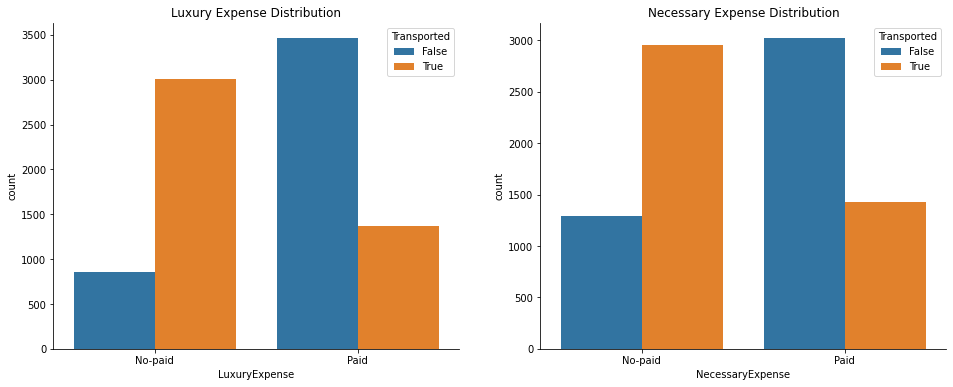

In [ ]:
### Plot
figures = plt.figure(figsize = (16, 6))

ax1 = figures.add_subplot(1, 2, 1)
sns.countplot(data = train, x = 'LuxuryExpense', hue = 'Transported')
sns.despine(bottom = False, left = False)
ax1.set(title = 'Luxury Expense Distribution')


ax2 = figures.add_subplot(1, 2, 2)
sns.countplot(data = train, x = 'NecessaryExpense', hue = 'Transported')
sns.despine(bottom = False, left = False)
plt.title('Necessary Expense Distribution')

plt.show()

The distribution of LuxuryExpense and NecessaryExpense is similar. That means passengers who do not pay for extra services are more likely to be transported while those who pay for at least a product are less likely to be transported to other dimensions.

Thus, we combine 2 type of services into 1 feature named Expenditure

In [ ]:
extra_services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['ExtraService'] = train[extra_services].sum(axis = 1)
train['Expenditure'] = (train['ExtraServices'] != 0).astype(int)
train.drop(columns = ['LuxuryServices', 'LuxuryExpense', 'NecessaryExpense', 'NecessaryServices'], inplace = True)


> #### 3.3. Categorical Features

Categorical variables include HomePlanet, CryoSleep, Destination and VIP. Similar to continuous features, we plot the number of True/False target for each feature.

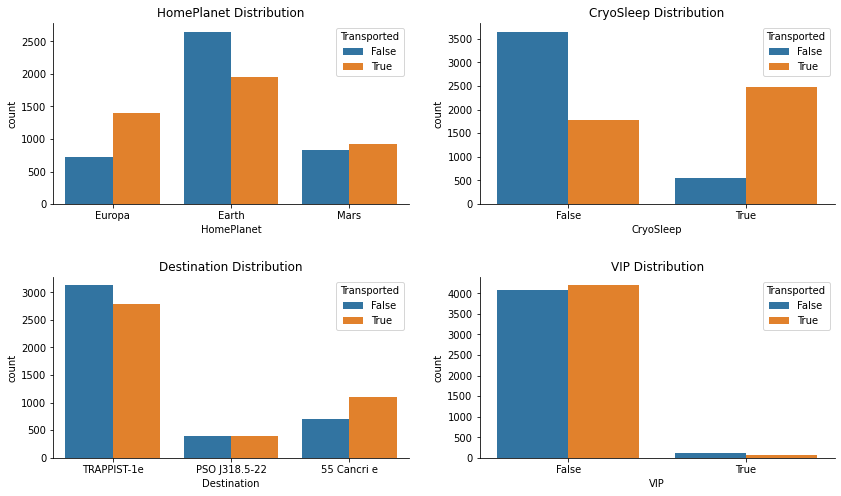

In [ ]:
categories = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

## Count plot
fig = plt.figure(figsize = (14, 8))
nrows = 2
ncols = 2

for i, category in enumerate(categories):

  ax = fig.add_subplot(nrows, ncols, i+1)
  sns.countplot(data = train, x = category, hue = 'Transported', )
  ax.set_title(category + ' Distribution')
  sns.despine(bottom = False, left = False)

plt.subplots_adjust(hspace= 0.4)
plt.show()

Some insights:
  - VIP feature does not give useful information as the rate of True and False is approximate.
  - CryoSleep should be a essential variable

> #### 3.4. Qualitative Features

Qualitative variables include PassengerID, Cabin and Name. Unfortunately, we cannot plot it directly because it combines many infomation per entry. We need to transform them to collect necessary data.
  - 3.4.1. PassengerId
  - 3.4.2. Cabin
  - 3.4.3. Name

In [ ]:
train.loc[:, ['PassengerId', 'Cabin', 'Name']].head(10)

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines
5,0005_01,F/0/P,Sandie Hinetthews
6,0006_01,F/2/S,Billex Jacostaffey
7,0006_02,G/0/S,Candra Jacostaffey
8,0007_01,F/3/S,Andona Beston
9,0008_01,B/1/P,Erraiam Flatic


Some insights:
  - PassengerId: the 4 first letters indicate the ID group and the last 2 letters indicate the number of people in the group, usually in a family, we can see the similar surname.
  

> > 3.4.1. PassengerId

The Group ID (the first 4 letters) may not have any influences on the target possibility, however the group size might have some insights. I will divide this feature into 'Alone' if the passerger travels alone and 'In group' if there are at least 2 members in a group.

In [ ]:
### Extract the group ID
train['GroupID'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['GroupID'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

### Extract group size
df = pd.concat([train['GroupID'], test['GroupID']])  # Need to combine all data to determine the group size
group_size = df.value_counts()      # Get number of memnbers for each GroupID
train['GroupSize'] = train['GroupID'].map(lambda x: group_size[x])
test['GroupSize'] = test['GroupID'].map(lambda x: group_size[x])
  
# You can write the nested function as below, but I found it spent more time to run
# train['GroupSize'] = train['GroupID'].map(lambda x: 
#                                           pd.concat([train['GroupID'], test['GroupID']]).value_counts()[x]
#                                           )


### Extract whether passenger travel in person or in group, 1 - in person, 0 - in group
train['InPerson'] = (train['GroupSize'] == 1).astype(int) 
test['InPerson'] = (test['GroupSize'] == 1).astype(int)


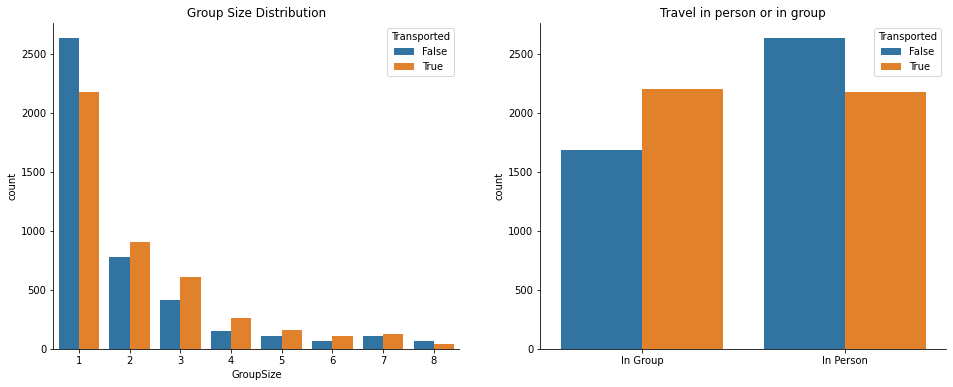

In [ ]:
### Plot GroupSize distribution
figures = plt.figure(figsize = (16, 6))
ax1 = figures.add_subplot(1, 2, 1)
sns.countplot(data = train, x = 'GroupSize', hue = 'Transported')
sns.despine(bottom = False, left = False)
ax1.set_title('Group Size Distribution')

### Plot In person/ in group travelers
ax2 = figures.add_subplot(1, 2, 2)
sns.countplot(data = train, x = 'InPerson', hue = 'Transported', order = [0, 1])
sns.despine(bottom = False, left = False)
ax2.set_title('Travel in person or in group')
ax2.set_xticklabels(['In Group', 'In Person'])
ax2.set(xlabel = None)

plt.show()

<br>
<br>


> > 3.4.2. Cabin

In [ ]:
### Because Cabin has missing values, we firsly fill in them by the correct format to extract the useful information
train['Cabin'].fillna('Z/9999/Z', inplace = True)
test['Cabin'].fillna('Z/9999/Z', inplace = True)

### Extract desk, number and side
train['CabinDeck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['CabinNumber'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['CabinSide'] = train['Cabin'].apply(lambda x: x.split('/')[2])

test['CabinDeck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['CabinNumber'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['CabinSide'] = test['Cabin'].apply(lambda x: x.split('/')[2])

### Return missing entries
train.loc[train['Cabin'] == 'Z/9999/Z', 'Cabin'] = None
train.loc[train['CabinDeck'] == 'Z', 'CabinDeck'] = None
train.loc[train['CabinNumber'] == 9999, 'CabinNumber'] = np.nan
train.loc[train['CabinSide'] == 'Z', 'CabinSide'] = None

test.loc[test['Cabin'] == 'Z/9999/Z', 'Cabin'] = None
test.loc[test['CabinDeck'] == 'Z', 'CabinDeck'] = None
test.loc[test['CabinNumber'] == 9999, 'CabinNumber'] = np.nan
test.loc[test['CabinSide'] == 'Z', 'CabinSide'] = None



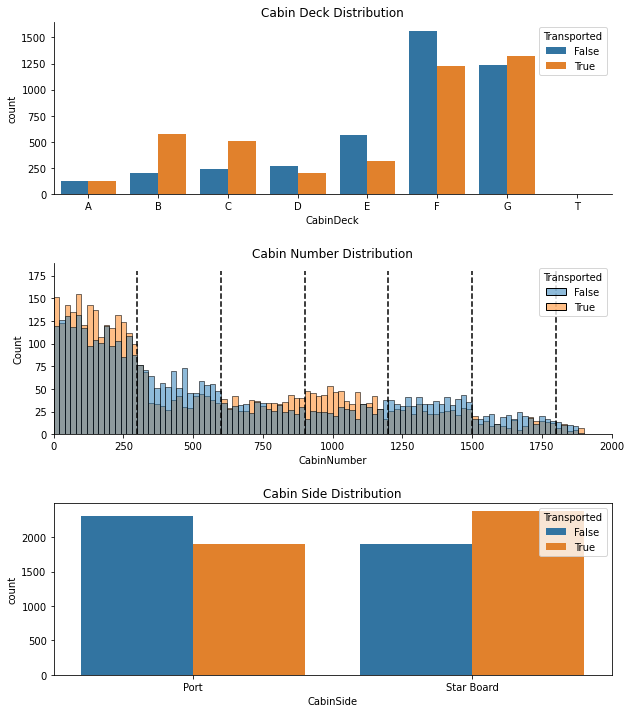

In [ ]:
### Plot Cabin desk, Cabin number, Cabin side distribution
figures = plt.figure(figsize = (10, 12))

ax1 = figures.add_subplot(3, 1, 1)
sns.countplot(data = train, x = 'CabinDeck', hue = 'Transported', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
sns.despine(bottom = False, left = False)
ax1.set(title = 'Cabin Deck Distribution')

ax2 = figures.add_subplot(3, 1, 2)
sns.histplot(data = train, x = 'CabinNumber', hue = 'Transported', binwidth = 20)
ax2.vlines(300, ymin =0, ymax = 180, color = 'black', linestyles = 'dashed')
ax2.vlines(600, ymin =0, ymax = 180, color = 'black', linestyles = 'dashed')
ax2.vlines(900, ymin =0, ymax = 180, color = 'black', linestyles = 'dashed')
ax2.vlines(1200, ymin =0, ymax = 180, color = 'black', linestyles = 'dashed')
ax2.vlines(1500, ymin =0, ymax = 180, color = 'black', linestyles = 'dashed')
ax2.vlines(1800, ymin =0, ymax = 180, color = 'black', linestyles = 'dashed')
ax2.set(xlim = [0, 2000])
ax2.set(title = 'Cabin Number Distribution')
sns.despine(bottom = False, left = False)

ax3 = figures.add_subplot(3, 1, 3)
sns.countplot(data = train, x = 'CabinSide', hue = 'Transported', order = ['P', 'S'])
ax3.set(title = 'Cabin Side Distribution')
ax3.set(xticklabels = ['Port', 'Star Board'])

plt.subplots_adjust(hspace = 0.4)
plt.show()


There are about 2000 cabin numbers but the interesting thing is that a chunk of 300 cabins has the similar trend, eg. the first group is more likely be transported while the second group inclines no-transported possibility. Therefore, we can group the cabin number into 7 groups like in the graph.

The T deck is an outliner with only 5 samples

<br>
<br>

> > 3.4.3. Name

  - Extract names and surnames

In [ ]:
### Filling the missing entries to split names
train['Name'].fillna('Name Surname', inplace = True)
test['Name'].fillna('Name Surname', inplace = True)


### Split names and surnames
train['Surname'] = train['Name'].apply(lambda x: x.split()[-1])
test['Surname'] = test['Name'].apply(lambda x: x.split()[-1])

### Return missing entries
train.loc[train['Surname'] == 'Surname', 'Surname'] = None
test.loc[test['Surname'] == 'Surname', 'Surname'] = None

I do not think the name has any effects on the transported possibility but it might be useful to determine the missing values in Destination or HomePlanet.

<br>

We will save the transformed data.

In [ ]:
train.to_csv('train_transform.csv', index = False)
files.download('train_transform.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test.to_csv('test_transform.csv', index = False)
files.download('test_transform.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>